In [1]:
# Bibliothèques standard
import joblib
import pandas as pd
import numpy as np
import shap

# Bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-learn pour la prétraitement
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import label_binarize

# Modules Scikit-learn pour les métriques
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    recall_score, 
    precision_score, 
    confusion_matrix, 
    classification_report, 
    ConfusionMatrixDisplay, 
    make_scorer, 
    matthews_corrcoef,
    roc_curve, 
    roc_auc_score,
    auc
)

# Modules Scikit-learn pour les modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Modules Joblib
from joblib import dump, load

# XGBoost
from xgboost import XGBClassifier

# Modules Imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Paramètres d'affichage pour Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

1. [**Préparation des données pour la modélisation**](#1.-Préparation-des-données-pour-la-modélisation)
    1.  [Séparation de la variable cible et des variables explicative](#A.-Séparation-de-la-variable-cible-et-des-variables-explicatives)
    2.  [Binarisation de la variable cible](#B.-Binarisation-de-la-variable-cible)
    3.  [Division des données en ensemble d'entrainement et de test](#B.-Division-des-données-en-ensemble-d'entrainement-et-de-test)
2. [**Entraînement du modèle avec les 5 solveurs et les hyperparamètres par défaut et analyse des performances**](#2.-Entraînement-du-modèle-avec-les-5-solveurs-et-les-hyperparamètres-par-défaut-et-analyse-des-performances)
3. [**GridSearchCV sans échantillonage pour trouver les meilleurs Hyper-Paramètres**](#3.-GridSearchCV-sans-échantillonage-pour-trouver-les-meilleurs-Hyper-Paramètres)
4. [**GridSearchCV Undersampling pour trouver les meilleurs Hyper-Paramètres**](#4.-GridSearchCV-Undersampling-pour-trouver-les-meilleurs-Hyper-Paramètres)
5. [**RandomSearchCV Oversampling pour trouver les meilleurs Hyper-Paramètres**](#5.-RandomSearchCV-Oversampling-pour-trouver-les-meilleurs-Hyper-Paramètres)
6. [**RandomSearchCV SMOTE**](#6.-RandomSearchCV-SMOTE)
7. [**Algorithme de boosting : Adaboost**](#7.-Algorithme-de-boosting-:-Adaboost)
8. [**Algorithme de bagging**](#8.-Algorithme-de-bagging)
9.  [**Shap**](#9.-Shap)


In [2]:
df = pd.read_csv('../data/dataset_18-21_for_model_encoding.csv', sep=',', index_col=0)

In [30]:
df.head()

,grav,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,3.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
201800000001,1.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
201800000002,1.0,-1.083406,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201800000003,3.0,-1.083406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800000004,1.0,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423136 entries, 201800000001 to 202100056518
Columns: 182 entries, grav to age_usag_75-plus
dtypes: float64(2), int64(180)
memory usage: 590.8 MB


In [33]:
print(df.shape)
df.head()

(423136, 182)


,grav,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,3.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
201800000001,1.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
201800000002,1.0,-1.083406,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201800000003,3.0,-1.083406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800000004,1.0,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 1. Préparation des données pour la modélisation

### A. Séparation de la variable cible et des variables explicatives

In [3]:
X = df.drop(['grav'], axis=1)
y = df['grav']

### B. Binarisation de la variable cible

In [4]:
# Création variable cible binaire
y = y.replace([1, 4], 0).replace([2, 3], 1)

In [5]:
y.value_counts()

grav
0.0    345502
1.0     77634
Name: count, dtype: int64

### C. Division des données en ensemble d'entrainement et de test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Dans notre exemple, l'argument test_size est réglé sur 0.1. Cela signifie que nous réservons 10% de notre ensemble de données pour les tests,
# laissant ainsi 90% pour l'entraînement du modèle.
# L'argument random_state est utilisé pour garantir la reproductibilité de notre répartition des données.
# En le définissant à 101, nous nous assurons que la séparation des données en ensembles d'entraînement et de test sera identique à chaque exécution du code,
# malgré le caractère aléatoire intrinsèque de la fonction train_test_split de Scikit-learn.
# Cette démarche assure une cohérence et une fiabilité accrue dans l'évaluation de nos modèles d'apprentissage automatique.

In [10]:
X_train.head()

,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201900026392,0.117620,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800002002,2.519672,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800046223,1.318646,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201900025538,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201900008933,-1.083406,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [11]:
y_test.value_counts()

grav
0.0    34551
1.0     7763
Name: count, dtype: int64

## 2. Entraînement du modèle avec les 5 solveurs et les hyperparamètres par défaut et analyse des performances

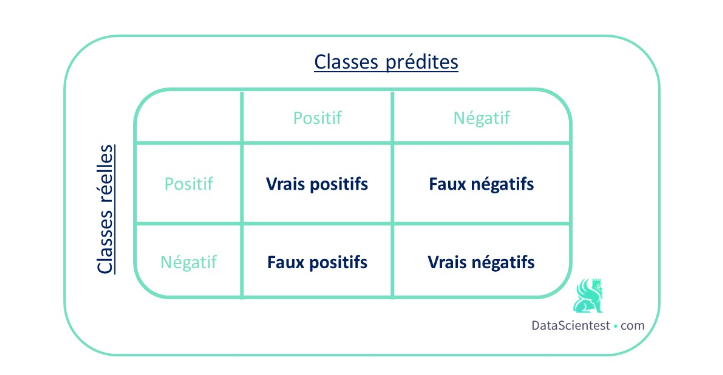


## Entrainement sur les 5 solveurs et évaluation des performances

#### Evaluation des 5 modèles avec les hyperparamètres par défauts

Utilisation du solveur newton-cg
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446912225125905

Moyenne F1_class_1: 0.4533458730921976

Moyenne recall_class_1: 0.35100396740778866

Moyenne precision_class_1: 0.6399911371392334

Moyenne precision_macro: 0.7537967836551892

Moyenne precision_micro: 0.8446912225125905

Moyenne precision_weighted: 0.8258416305223119

Moyenne recall_macro: 0.6533136012761899

Moyenne recall_micro: 0.8446912225125905

Moyenne recall_weighted: 0.8446912225125905

Moyenne f1_macro: 0.681416786769327

Moyenne f1_micro: 0.8446912225125905

Moyenne f1_weighted: 0.8257974595057336

Moyenne roc_auc: 0.849715415241494

Moyenne matthews_corrcoef:

<Figure size 200x200 with 0 Axes>

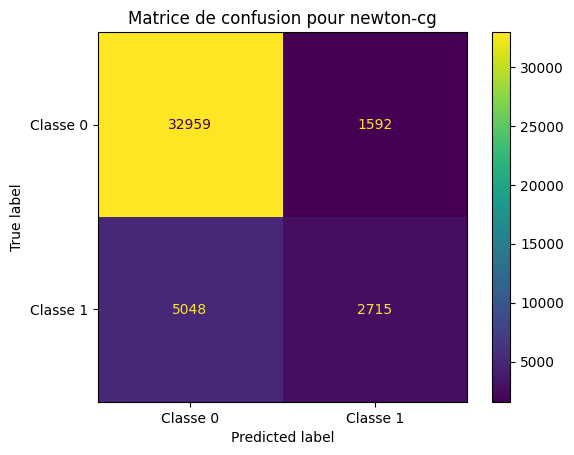

              precision    recall  f1-score   support

           0    0.86718   0.95392   0.90849     34551
           1    0.63037   0.34974   0.44988      7763

    accuracy                        0.84308     42314
   macro avg    0.74878   0.65183   0.67918     42314
weighted avg    0.82374   0.84308   0.82435     42314


****************************************************************************************************

Utilisation du solveur lbfgs
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446964742548554

Moyenne F1_class_1: 0.45338433970450237

Moyenne recall_class_1: 0.35104690244707415

Moyenne precision_class_1: 0.6400015226564534

Moyenne precision_macr

<Figure size 200x200 with 0 Axes>

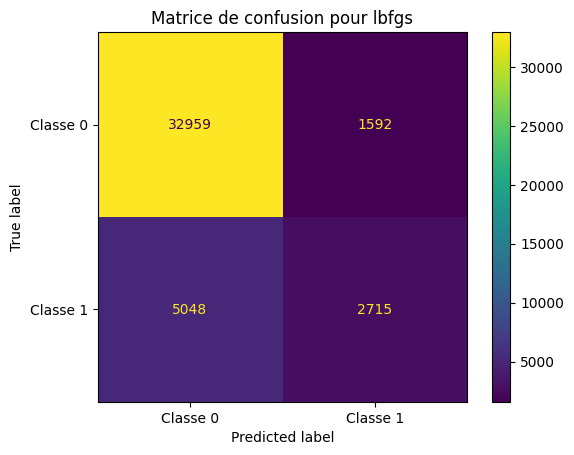

              precision    recall  f1-score   support

           0    0.86718   0.95392   0.90849     34551
           1    0.63037   0.34974   0.44988      7763

    accuracy                        0.84308     42314
   macro avg    0.74878   0.65183   0.67918     42314
weighted avg    0.82374   0.84308   0.82435     42314


****************************************************************************************************

Utilisation du solveur liblinear
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446912225332767

Moyenne F1_class_1: 0.4533360090159754

Moyenne recall_class_1: 0.35098965511352787

Moyenne precision_class_1: 0.6399974350543283

Moyenne precisi

<Figure size 200x200 with 0 Axes>

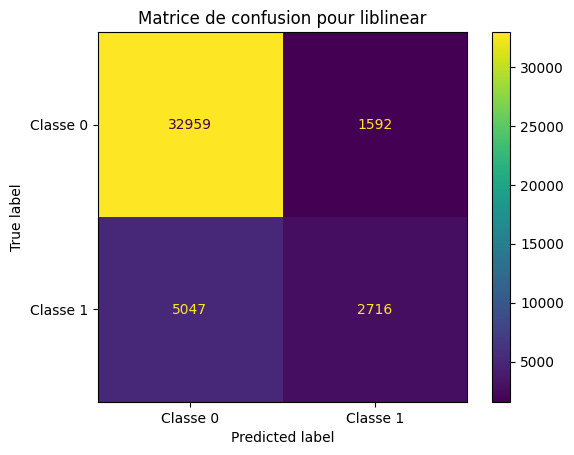

              precision    recall  f1-score   support

           0    0.86721   0.95392   0.90850     34551
           1    0.63045   0.34986   0.45000      7763

    accuracy                        0.84310     42314
   macro avg    0.74883   0.65189   0.67925     42314
weighted avg    0.82377   0.84310   0.82438     42314


****************************************************************************************************

Utilisation du solveur sag
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446938484250951

Moyenne F1_class_1: 0.453360164341704

Moyenne recall_class_1: 0.35101827970204935

Moyenne precision_class_1: 0.6400012590888844

Moyenne precision_macro: 0.7

<Figure size 200x200 with 0 Axes>

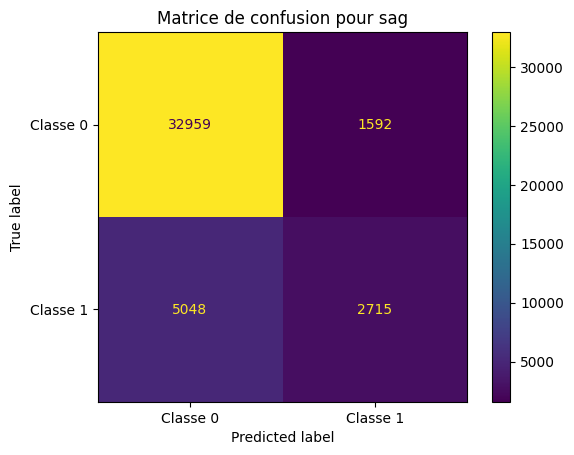

              precision    recall  f1-score   support

           0    0.86718   0.95392   0.90849     34551
           1    0.63037   0.34974   0.44988      7763

    accuracy                        0.84308     42314
   macro avg    0.74878   0.65183   0.67918     42314
weighted avg    0.82374   0.84308   0.82435     42314


****************************************************************************************************

Utilisation du solveur saga
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.8446964743375998

Moyenne F1_class_1: 0.45336449665695383

Moyenne recall_class_1: 0.3510182803165483

Moyenne precision_class_1: 0.6400176952299778

Moyenne precision_macro: 

<Figure size 200x200 with 0 Axes>

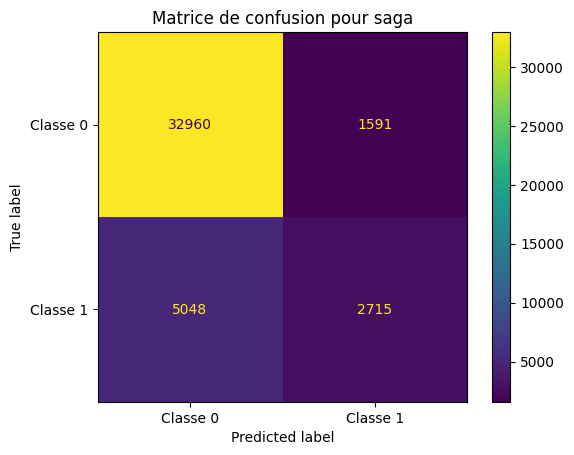

              precision    recall  f1-score   support

           0    0.86719   0.95395   0.90850     34551
           1    0.63052   0.34974   0.44991      7763

    accuracy                        0.84310     42314
   macro avg    0.74885   0.65184   0.67921     42314
weighted avg    0.82377   0.84310   0.82437     42314


****************************************************************************************************

Modèles triés par F1-score sur la classe 1 :
liblinear: F1-Score = 0.4500041421588932, Accuracy = 0.843101573947157, ROC AUC = 0.8491236463931864
saga: F1-Score = 0.4499130002485707, Accuracy = 0.843101573947157, ROC AUC = 0.8491198994608193
newton-cg: F1-Score = 0.4498757249378625, Accuracy = 0.8430779411069622, ROC AUC = 0.8491198025252558
lbfgs: F1-Score = 0.4498757249378625, Accuracy = 0.8430779411069622, ROC AUC = 0.8491201753543469
sag: F1-Score = 0.4498757249378625, Accuracy = 0.8430779411069622, ROC AUC = 0.849119921830565


In [2]:
# Chargement des données
df = pd.read_csv('data/dataset_18-21_for_model_encoding.csv', sep=',', index_col=0)
X = df.drop(['grav'], axis=1)
y = df['grav']
y = y.replace([1, 4], 0).replace([2, 3], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Liste de solveurs à tester
solveurs = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Hyperparamètres
C_value = 1.0
max_iter_value = 1000

# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Test de chaque solveur
model_results = []
for solveur in solveurs:
    print(f"Utilisation du solveur {solveur}")
    print("-" * 50 + "\n")

    clf = LogisticRegression(solver=solveur, C=C_value, max_iter=max_iter_value)
    print("Hyperparamètres :", clf.get_params())

    cv_results = cross_validate(clf, X_train, y_train, cv=3, scoring=scoring)

    # Affichage des moyennes pour toutes les métriques
    for metric in scoring.keys():
        mean_score = np.mean(cv_results['test_' + metric])
        print(f"Moyenne {metric}: {mean_score}\n")

    # Entraînement du modèle
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_test_prob = clf.predict_proba(X_test)[:, 1]
    
    # Enregistrement du modèle
    joblib.dump(clf, f"modeles_fabien/binary_{solveur}_model.joblib")

    # Matrice de confusion
    plt.figure(figsize=(2, 2))
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
    disp.plot()
    plt.title(f"Matrice de confusion pour {solveur}")
    plt.show()
    
    # Rapport de classification
    print(classification_report(y_test, y_test_pred, labels=[0,1], digits=5))
    
    # Calcul des métriques sur le jeu de test
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score_class_1(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    
    # Enregistrement des résultats dans la liste
    model_results.append((solveur, test_f1, test_accuracy, test_roc_auc))
    print("\n" + "*" * 100 + "\n")

# Tri des modèles par F1-score
model_results.sort(key=lambda x: x[1], reverse=True)

# Affichage des modèles triés
print("Modèles triés par F1-score sur la classe 1 :")
for solveur, f1, test_accuracy, test_roc_auc in model_results:
    print(f"{solveur}: F1-Score = {f1}, Accuracy = {test_accuracy}, ROC AUC = {test_roc_auc}")

# Temps d'éxécution = 27m 41.2s
    

#### le meilleur modèle

Le meilleur solveur est : liblinear


<Figure size 200x200 with 0 Axes>

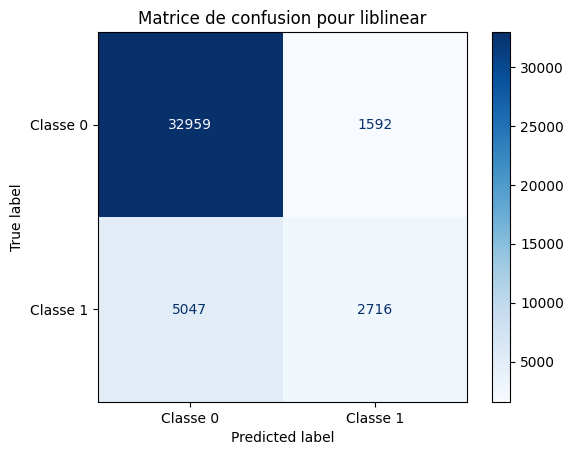

              precision    recall  f1-score   support

           0    0.86721   0.95392   0.90850     34551
           1    0.63045   0.34986   0.45000      7763

    accuracy                        0.84310     42314
   macro avg    0.74883   0.65189   0.67925     42314
weighted avg    0.82377   0.84310   0.82438     42314



['modeles_fabien/binary_liblinear_best_model.joblib']

In [3]:
# Affichage du nom du meilleur solveur
best_solver = model_results[0][0]
print(f"Le meilleur solveur est : {best_solver}")

# Réentraînement du modèle en utilisant le meilleur solveur
best_model = LogisticRegression(solver=best_solver, C=C_value, max_iter=max_iter_value)
best_model.fit(X_train, y_train)

# Prédiction avec le meilleur modèle
y_test_pred = best_model.predict(X_test)

# Calcul de la probabilité de la classe positive pour le ROC AUC
y_test_prob = best_model.predict_proba(X_test)[:, 1]

# Matrice de confusion
plt.figure(figsize=(2, 2))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matrice de confusion pour {best_solver}")
plt.show()
    
# Calcul et affichage des métriques sur le jeu de test
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score_class_1(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
print(classification_report(y_test, y_test_pred, labels=[0, 1], digits=5))
    
# Sauvegarde du modèle entraîné avec le meilleur solveur
filename = f"modeles_fabien/binary_{best_solver}_best_model.joblib"
joblib.dump(best_model, filename)

# temps d'éxécution = 11.1s

#### Courbe ROC

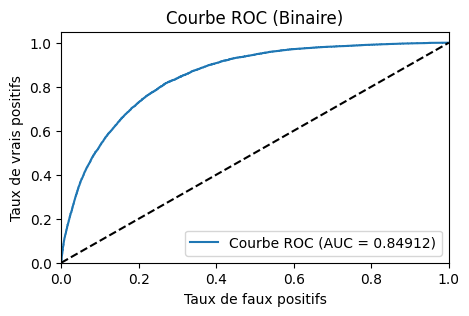

In [5]:
# Chargement du modèle

best_model = joblib.load(f"modeles_fabien/binary_liblinear_best_model.joblib")
y_test_pred = best_model.predict(X_test)

# Tracer la courbe ROC
y_score = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

## 3. GridSearchCV sans échantillonage pour trouver les meilleurs Hyper-Paramètres

#### Résultats bruts

In [7]:
# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}


param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"],
        'class_weight': ['balanced', None] 
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'class_weight': ['balanced', None] 
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0],
        'class_weight': ['balanced',None] 
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"],
        'class_weight': ['balanced', None] 
    }
]

log_model = LogisticRegression(random_state=42)
grid_model = GridSearchCV(log_model, param_grid, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
grid_model.fit(X_train, y_train)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(grid_model.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('Logistique/binary_grid_search_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())
# 202m 6.0ss

Fitting 3 folds for each of 528 candidates, totalling 1584 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       8.805908      0.698655         1.926096        0.117650   0.001   
1      21.980487      0.266486         2.168932        0.215122   0.001   
2       7.290781      1.530713         1.842735        0.152586   0.001   
3      20.951610      1.227900         3.359585        2.210251   0.001   
4       5.188112      0.820496         2.153837        0.333823   0.001   

  param_class_weight param_max_iter param_multi_class param_penalty  \
0           balanced           1000               ovr            l1   
1           balanced           1000               ovr            l1   
2           balanced          10000               ovr            l1   
3           balanced          10000               ovr            l1   
4           balanced         100000               ovr            l1   

  param_solver param_l1_ratio  \
0    liblinear           

#### Résultat net

In [10]:
# Chargement du fichier CSV
resultats = pd.read_csv('Logistique/binary_grid_search_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'Logistique/binary_grid_search_results_net.csv'
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,C,class_weight,max_iter,multi_class,penalty,solver,l1_ratio,accuracy,F1_class_1,recall_class_1,precision_class_1,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,0.001,balanced,1000,ovr,l1,liblinear,NaN,0.742160,0.522630,0.769275,0.395746,0.664973,0.742160,0.835408,0.752671,0.742160,0.742160,0.673006,0.742160,0.768202,0.830229,0.408333,0.642931
1,0.001,balanced,1000,ovr,l1,saga,NaN,0.742436,0.522827,0.769060,0.396029,0.665102,0.742436,0.835439,0.752757,0.742436,0.742436,0.673221,0.742436,0.768427,0.830256,0.408562,0.643142
2,0.001,balanced,10000,ovr,l1,liblinear,NaN,0.742160,0.522630,0.769275,0.395746,0.664973,0.742160,0.835408,0.752671,0.742160,0.742160,0.673006,0.742160,0.768202,0.830229,0.408333,0.642931
3,0.001,balanced,10000,ovr,l1,saga,NaN,0.742436,0.522827,0.769060,0.396029,0.665102,0.742436,0.835439,0.752757,0.742436,0.742436,0.673221,0.742436,0.768427,0.830256,0.408562,0.643142
4,0.001,balanced,100000,ovr,l1,liblinear,NaN,0.742160,0.522630,0.769275,0.395746,0.664973,0.742160,0.835408,0.752671,0.742160,0.742160,0.673006,0.742160,0.768202,0.830229,0.408333,0.642931
5,0.001,balanced,100000,ovr,l1,saga,NaN,0.742436,0.522827,0.769060,0.396029,0.665102,0.742436,0.835439,0.752757,0.742436,0.742436,0.673221,0.742436,0.768427,0.830256,0.408562,0.643142
6,0.001,NaN,1000,ovr,l1,liblinear,NaN,0.829894,0.267559,0.169341,0.637054,0.738418,0.829894,0.802586,0.573831,0.829894,0.829894,0.585666,0.829894,0.787044,0.814046,0.265350,0.522045
7,0.001,NaN,1000,ovr,l1,saga,NaN,0.832738,0.275114,0.173004,0.671488,0.756114,0.832738,0.809686,0.576993,0.832738,0.832738,0.590288,0.832738,0.789809,0.816632,0.280840,0.527253
8,0.001,NaN,10000,ovr,l1,liblinear,NaN,0.829894,0.267559,0.169341,0.637054,0.738418,0.829894,0.802586,0.573831,0.829894,0.829894,0.585666,0.829894,0.787044,0.814046,0.265350,0.522045
9,0.001,NaN,10000,ovr,l1,saga,NaN,0.832738,0.275114,0.173004,0.671488,0.756114,0.832738,0.809686,0.576993,0.832738,0.832738,0.590288,0.832738,0.789809,0.816632,0.280840,0.527253


#### Résultats Max

In [11]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_1 = df_resultat['F1_class_1'].idxmax()
index_max_recall_class_1 = df_resultat['recall_class_1'].idxmax()
index_max_precision_class_1 = df_resultat['precision_class_1'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_1, index_max_recall_class_1, index_max_precision_class_1,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'Logistique/binary_grid_search_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement et évaluation du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'max_iter': 1000, 'multi_class': 'ovr', 'solver': 'saga', 'class_weight': 'balanced', 'C': 1.0, 'penalty': 'l2'}


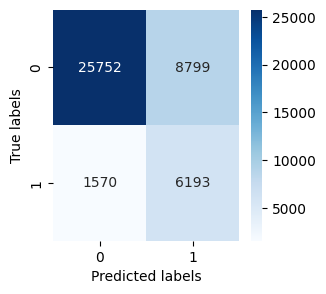

              precision    recall  f1-score   support

     Class 0    0.94254   0.74533   0.83241     34551
     Class 1    0.41309   0.79776   0.54432      7763

    accuracy                        0.75495     42314
   macro avg    0.67781   0.77155   0.68837     42314
weighted avg    0.84540   0.75495   0.77956     42314



In [15]:
# Chargement du fichier CSV
results_df = pd.read_csv('Logistique/binary_grid_search_results_max.csv')

# Récupération de l'index du meilleur score pour "mean_test_F1_class_2"
best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "solver": best_row['solver'],
    'class_weight': best_row['class_weight'],
}

# Ajout conditionnel des hyperparamètres s'ils ne sont pas None
for param in ['l1_ratio', 'C', 'penalty']:
    if param in best_row and not pd.isna(best_row[param]):
        best_params[param] = best_row[param]

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train, y_train)
y_pred = log_model_best.predict(X_test)

# Enregistrement du modèle
joblib.dump(log_model_best, f"Logistique/binary_best_grid_model.joblib")

# Calcul de la matrice de confusion en spécifiant les labels
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Rapport de classification
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Class 0", "Class 1"], digits=5)

print(report)


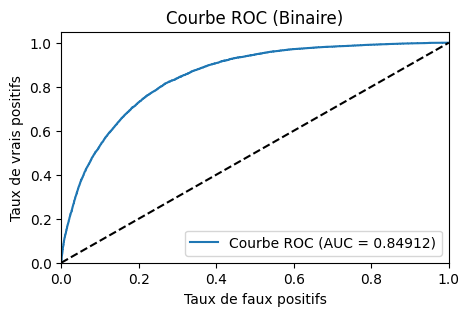

In [14]:
# Prédictions de probabilités pour la classe positive
y_score = log_model_best.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

## 4. GridSearchCV Undersampling pour trouver les meilleurs Hyper-Paramètres

In [38]:
rus = RandomUnderSampler()
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

#### Résultats bruts

In [24]:
# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"],
        'class_weight': ['balanced', None] 
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'class_weight': ['balanced', None] 
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0],
        'class_weight': ['balanced',None] 
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"],
        'class_weight': ['balanced', None] 
    }
]

log_model = LogisticRegression(random_state=42)
grid_model = GridSearchCV(log_model, param_grid, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
grid_model.fit(X_train_us, y_train_us)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(grid_model.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('Logistique/binary_grid_search_under_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())

# 241m 44.3s

Fitting 3 folds for each of 528 candidates, totalling 1584 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.639045      0.081985         0.565068        0.021280   0.001   
1       7.371991      0.230932         0.594096        0.016742   0.001   
2       1.594807      0.225672         0.596224        0.012190   0.001   
3       7.204244      0.206289         0.635120        0.004041   0.001   
4       1.344572      0.077601         0.604401        0.011210   0.001   

  param_class_weight param_max_iter param_multi_class param_penalty  \
0           balanced           1000               ovr            l1   
1           balanced           1000               ovr            l1   
2           balanced          10000               ovr            l1   
3           balanced          10000               ovr            l1   
4           balanced         100000               ovr            l1   

  param_solver param_l1_ratio  \
0    liblinear           

#### Résultat net

In [39]:
# Chargement du fichier CSV
resultats = pd.read_csv('Logistique/binary_grid_search_under_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'Logistique/binary_grid_search_under_results_net.csv' # Vous pouvez changer ce chemin selon vos besoins
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,C,class_weight,max_iter,multi_class,penalty,solver,l1_ratio,accuracy,F1_class_1,recall_class_1,precision_class_1,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,0.001,balanced,1000,ovr,l1,liblinear,NaN,0.727376,0.728587,0.731849,0.725361,0.727399,0.727376,0.727399,0.727376,0.727376,0.727376,0.727369,0.727376,0.727369,0.799292,0.454775,0.727613
1,0.001,balanced,1000,ovr,l1,saga,NaN,0.727691,0.730120,0.736700,0.723663,0.727769,0.727691,0.727769,0.727691,0.727691,0.727691,0.727668,0.727691,0.727668,0.799419,0.455460,0.728158
2,0.001,balanced,10000,ovr,l1,liblinear,NaN,0.727376,0.728587,0.731849,0.725361,0.727399,0.727376,0.727399,0.727376,0.727376,0.727376,0.727369,0.727376,0.727369,0.799292,0.454775,0.727613
3,0.001,balanced,10000,ovr,l1,saga,NaN,0.727691,0.730120,0.736700,0.723663,0.727769,0.727691,0.727769,0.727691,0.727691,0.727691,0.727668,0.727691,0.727668,0.799419,0.455460,0.728158
4,0.001,balanced,100000,ovr,l1,liblinear,NaN,0.727376,0.728587,0.731849,0.725361,0.727399,0.727376,0.727399,0.727376,0.727376,0.727376,0.727369,0.727376,0.727369,0.799292,0.454775,0.727613
5,0.001,balanced,100000,ovr,l1,saga,NaN,0.727691,0.730120,0.736700,0.723663,0.727769,0.727691,0.727769,0.727691,0.727691,0.727691,0.727668,0.727691,0.727668,0.799419,0.455460,0.728158
6,0.001,NaN,1000,ovr,l1,liblinear,NaN,0.727376,0.728587,0.731849,0.725361,0.727399,0.727376,0.727399,0.727376,0.727376,0.727376,0.727369,0.727376,0.727369,0.799292,0.454775,0.727613
7,0.001,NaN,1000,ovr,l1,saga,NaN,0.727691,0.730120,0.736700,0.723663,0.727769,0.727691,0.727769,0.727691,0.727691,0.727691,0.727668,0.727691,0.727668,0.799419,0.455460,0.728158
8,0.001,NaN,10000,ovr,l1,liblinear,NaN,0.727376,0.728587,0.731849,0.725361,0.727399,0.727376,0.727399,0.727376,0.727376,0.727376,0.727369,0.727376,0.727369,0.799292,0.454775,0.727613
9,0.001,NaN,10000,ovr,l1,saga,NaN,0.727691,0.730120,0.736700,0.723663,0.727769,0.727691,0.727769,0.727691,0.727691,0.727691,0.727668,0.727691,0.727668,0.799419,0.455460,0.728158


#### Résultats max

In [40]:

# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_1 = df_resultat['F1_class_1'].idxmax()
index_max_recall_class_1 = df_resultat['recall_class_1'].idxmax()
index_max_precision_class_1 = df_resultat['precision_class_1'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_1, index_max_recall_class_1, index_max_precision_class_1,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'Logistique/binary_grid_search_under_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement et évaluation du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'max_iter': 1000, 'multi_class': 'ovr', 'solver': 'lbfgs'}


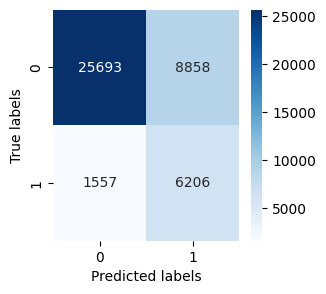

In [41]:
# Chargement du fichier CSV
results_df = pd.read_csv('Logistique/binary_grid_search_under_results_max.csv')
best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "solver": best_row['solver']
}

# Ajout conditionnel des hyperparamètres s'ils ne sont pas NaN
for param in ['l1_ratio', 'C', 'penalty', 'class_weight']:
    if param in best_row and not pd.isna(best_row[param]):
        best_params[param] = best_row[param]


# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train_us, y_train_us)

# Enregistrement du modèle
joblib.dump(log_model_best, f"Logistique/binary_best_grid_under_model.joblib")

# Prédiction des classes pour l'ensemble de test
y_pred = log_model_best.predict(X_test)

# Calcul de la matrice de confusion en spécifiant les labels
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [42]:
# Rapport de classification
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Class 0", "Class 1"], digits=5)
print(report)

              precision    recall  f1-score   support

     Class 0    0.94286   0.74363   0.83148     34551
     Class 1    0.41198   0.79943   0.54374      7763

    accuracy                        0.75386     42314
   macro avg    0.67742   0.77153   0.68761     42314
weighted avg    0.84546   0.75386   0.77869     42314



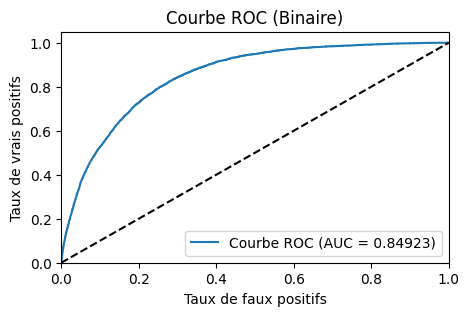

In [43]:
# Prédictions de probabilités pour la classe positive
y_score = log_model_best.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

In [44]:
# Obtention des coefficients
coefficients = log_model_best.coef_

# Création d'un DataFrame pour afficher les coefficients
coeff_df = pd.DataFrame(coefficients, columns = X_train.columns)
import matplotlib.pyplot as plt
import numpy as np

# Obtention des coefficients
coefficients = log_model_best.coef_[0]

# Création d'un DataFrame pour afficher les coefficients absolus
abs_coeff_df = pd.DataFrame(np.abs(coefficients), index = X_train.columns, columns=['Abs_Coefficient'])

# Tri des valeurs par importance
sorted_coeff_df = abs_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

sorted_coeff_df.head(10)

,Abs_Coefficient
catu_3,4.240280
obsm_1.0,2.429664
age_usag_75-plus,2.073687
obs_17.0,1.940256
obs_2.0,1.674317
age_usag_65-74,1.618062
catv_5.0,1.477218
age_cond_95-plus,1.457477
manv_22.0,1.445860
obs_6.0,1.381456


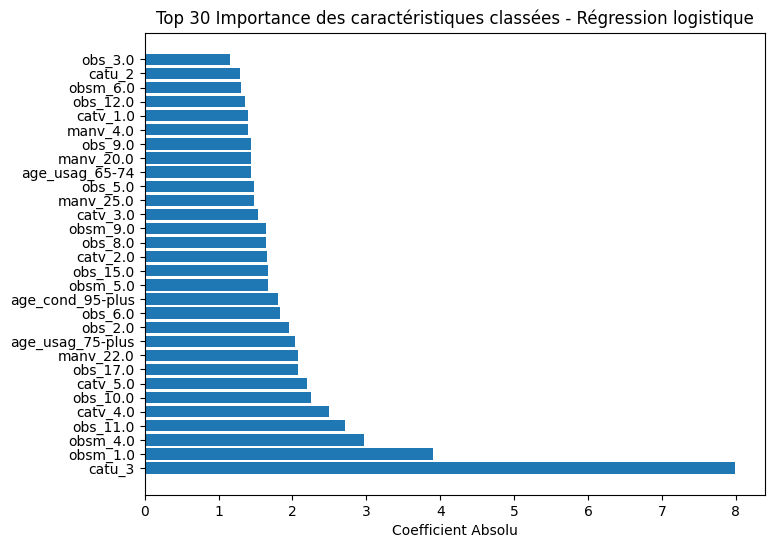

In [22]:
# Sélection des 30 premières valeurs
top_30_df = sorted_coeff_df.head(30)

# graphique à barres horizontales des coefficients
plt.figure(figsize=(8, 6))
plt.barh(top_30_df.index, top_30_df['Abs_Coefficient'])
plt.xlabel('Coefficient Absolu')
plt.title('Top 30 Importance des caractéristiques classées - Régression logistique')
plt.show()

## 5. RandomSearchCV Oversampling pour trouver les meilleurs Hyper-Paramètres

In [41]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

#### Résultats bruts

In [43]:
# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"],
        'class_weight': ['balanced', None] 
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'class_weight': ['balanced', None] 
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0],
        'class_weight': ['balanced',None] 
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"],
        'class_weight': ['balanced', None] 
    }
]

log_model = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(log_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
random_search.fit(X_train_os, y_train_os)

# Conversion les résultats en DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('Logistique/binary_random_search_over_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())

# 127m 59.1s


Fitting 3 folds for each of 100 candidates, totalling 300 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0      37.614275      2.406765         3.850122        0.420531          sag   
1     347.836000      4.850228         3.768474        0.114393    newton-cg   
2      58.522067      3.080432         3.366951        0.097774         saga   
3     406.318341     16.855747         3.189648        0.290990         saga   
4      67.765531      3.850974         3.708377        0.097688         saga   

  param_penalty param_multi_class param_max_iter param_class_weight param_C  \
0            l2               ovr           1000           balanced    0.01   
1            l2               ovr           1000               None      10   
2            l2               ovr           1000           balanced    0.01   
3    elasticnet       multinomial          10000               None       1   
4            l1               ovr          10000           ba

#### Résultat net

In [44]:
# Chargement du fichier CSV
resultats = pd.read_csv('Logistique/binary_random_search_over_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'Logistique/binary_random_search_over_results_net.csv' # Vous pouvez changer ce chemin selon vos besoins
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,solver,penalty,multi_class,max_iter,class_weight,C,l1_ratio,accuracy,F1_class_1,recall_class_1,precision_class_1,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,sag,l2,ovr,1000,balanced,0.010,NaN,0.770396,0.775941,0.795145,0.757644,0.771061,0.770396,0.771061,0.770396,0.770396,0.770396,0.770255,0.770396,0.770255,0.849698,0.541457,0.771393
1,newton-cg,l2,ovr,1000,NaN,10.000,NaN,0.771441,0.777039,0.796550,0.758463,0.772129,0.771441,0.772129,0.771441,0.771441,0.771441,0.771297,0.771441,0.771297,0.850628,0.543570,0.772445
2,saga,l2,ovr,1000,balanced,0.010,NaN,0.770396,0.775939,0.795135,0.757649,0.771061,0.770396,0.771061,0.770396,0.770396,0.770396,0.770256,0.770396,0.770256,0.849698,0.541457,0.771392
3,saga,elasticnet,multinomial,10000,NaN,1.000,0.5,0.771437,0.777042,0.796579,0.758442,0.772126,0.771437,0.772126,0.771437,0.771437,0.771437,0.771292,0.771437,0.771292,0.850626,0.543562,0.772442
4,saga,l1,ovr,10000,balanced,0.010,NaN,0.768994,0.774689,0.794270,0.756051,0.769684,0.768994,0.769684,0.768994,0.768994,0.768994,0.768846,0.768994,0.768846,0.848636,0.538678,0.770015
5,newton-cg,l2,ovr,100000,NaN,0.001,NaN,0.764881,0.769854,0.786494,0.753906,0.765378,0.764881,0.765378,0.764881,0.764881,0.764881,0.764771,0.764881,0.764771,0.844167,0.530259,0.765788
6,lbfgs,NaN,ovr,1000,balanced,NaN,NaN,0.771416,0.777015,0.796531,0.758435,0.772104,0.771416,0.772104,0.771416,0.771416,0.771416,0.771271,0.771416,0.771271,0.850628,0.543519,0.772420
7,saga,elasticnet,multinomial,1000,balanced,0.100,0.5,0.771456,0.777100,0.796778,0.758371,0.772155,0.771456,0.772155,0.771456,0.771456,0.771456,0.771309,0.771456,0.771309,0.850571,0.543611,0.772467
8,saga,NaN,multinomial,100000,balanced,NaN,NaN,0.771441,0.777038,0.796547,0.758464,0.772129,0.771441,0.772129,0.771441,0.771441,0.771441,0.771297,0.771441,0.771297,0.850628,0.543570,0.772445
9,newton-cg,l2,multinomial,1000,balanced,10.000,NaN,0.771440,0.777038,0.796550,0.758461,0.772128,0.771440,0.772128,0.771440,0.771440,0.771440,0.771295,0.771440,0.771295,0.850628,0.543567,0.772444


#### Résultats Max

In [45]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_1 = df_resultat['F1_class_1'].idxmax()
index_max_recall_class_1 = df_resultat['recall_class_1'].idxmax()
index_max_precision_class_1 = df_resultat['precision_class_1'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_1, index_max_recall_class_1, index_max_precision_class_1,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'Logistique/binary_random_search_over_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement et évaluation du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'max_iter': 100000, 'multi_class': 'ovr', 'solver': 'liblinear', 'C': 0.1, 'penalty': 'l1', 'class_weight': 'balanced'}


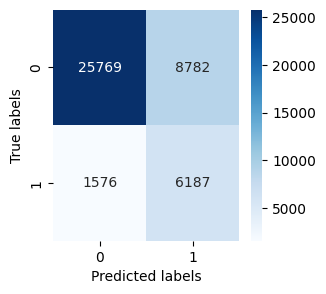

In [59]:
# Chargement du fichier CSV
results_df = pd.read_csv('Logistique/binary_random_search_over_results_max.csv')

best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "solver": best_row['solver']
}

# Ajout conditionnel des hyperparamètres s'ils ne sont pas NaN
for param in ['l1_ratio', 'C', 'penalty', 'class_weight']:
    if param in best_row and not pd.isna(best_row[param]):
        best_params[param] = best_row[param]

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train_os, y_train_os)

# Enregistrement du modèle
joblib.dump(log_model_best, f"Logistique/binary_best_random_over_model.joblib")

# Prédiction des classes pour l'ensemble de test
y_pred = log_model_best.predict(X_test)

# Calcul de la matrice de confusion en spécifiant les labels
labels = [0, 1]  # Remplacez par vos véritables labels si ce ne sont pas 0 et 1
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# 2m 34.3s


In [47]:
# Rapport de classification
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Class 0", "Class 1"], digits=5)
print(report)

              precision    recall  f1-score   support

     Class 0    0.94237   0.74583   0.83265     34551
     Class 1    0.41332   0.79699   0.54434      7763

    accuracy                        0.75521     42314
   macro avg    0.67784   0.77141   0.68850     42314
weighted avg    0.84531   0.75521   0.77976     42314



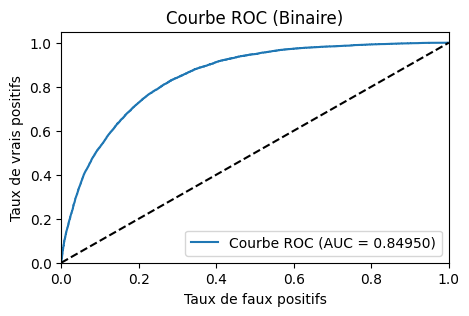

In [48]:
# Prédictions de probabilités pour la classe positive
y_score = log_model_best.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

In [49]:
# Obtention des coefficients
coefficients = log_model_best.coef_

# Création d'un DataFrame pour afficher les coefficients
coeff_df = pd.DataFrame(coefficients, columns = X_train.columns)
import matplotlib.pyplot as plt
import numpy as np

# Obtention des coefficients
coefficients = log_model_best.coef_[0]

# Création d'un DataFrame pour afficher les coefficients absolus
abs_coeff_df = pd.DataFrame(np.abs(coefficients), index = X_train.columns, columns=['Abs_Coefficient'])

# Tri des valeurs par importance
sorted_coeff_df = abs_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

sorted_coeff_df.head(10)

,Abs_Coefficient
catu_3,3.967621
obsm_1.0,2.395058
age_usag_75-plus,1.977377
obs_17.0,1.711357
catv_5.0,1.684474
obs_2.0,1.610380
age_usag_65-74,1.483114
manv_22.0,1.380112
obs_6.0,1.368514
catv_4.0,1.322316


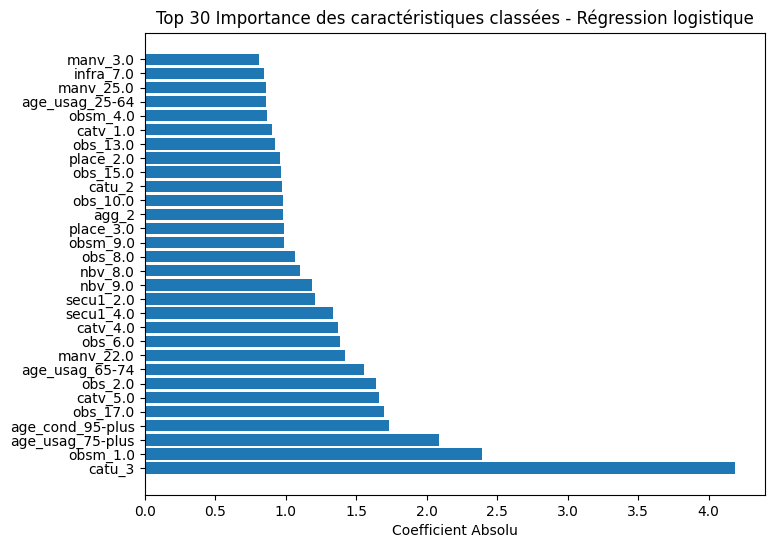

In [29]:
# Sélection des 30 premières valeurs
top_30_df = sorted_coeff_df.head(30)

# graphique à barres horizontales des coefficients
plt.figure(figsize=(8, 6))
plt.barh(top_30_df.index, top_30_df['Abs_Coefficient'])
plt.xlabel('Coefficient Absolu')
plt.title('Top 30 Importance des caractéristiques classées - Régression logistique')
plt.show()

## 6. RandomSearchCV SMOTE

#### Résultat brut

In [50]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [52]:
# Fonctions de scoring
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (f1_score_class_0 + 1.5* f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

# Dictionnaire de scoring
scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Dictionnaire des paramètres pour RandomizedSearchCV
param_distributions = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"],
        'class_weight': ['balanced', None] 
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'class_weight': ['balanced', None] 
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0],
        'class_weight': ['balanced',None] 
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"],
        'class_weight': ['balanced', None] 
    }
]

log_model = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(log_model, param_distributions=param_distributions, n_iter=50, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False) # refit sur votre métrique personnalisée
random_search.fit(X_train_smote, y_train_smote)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('Logistique/binary_random_search_smote_results_brut.csv')

# Afficher les premières lignes du DataFrame
print(results_df.head())

# Temps d'exécution : 272m 59.9s

Fitting 3 folds for each of 50 candidates, totalling 150 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0      42.988833      2.330028         3.688372        0.280141         saga   
1     295.069933     32.729423         3.191025        0.381474    newton-cg   
2     659.301427     64.811000         2.724355        0.062121         saga   
3      35.922734      2.428284         3.577497        0.237187        lbfgs   
4      37.044085      1.461251         3.751081        0.035791         saga   

  param_penalty param_multi_class param_max_iter param_class_weight param_C  \
0            l2               ovr         100000               None    0.01   
1            l2               ovr         100000               None      10   
2    elasticnet               ovr          10000               None       1   
3            l2       multinomial         100000           balanced   0.001   
4    elasticnet               ovr         100000              

#### Résultat net

In [53]:
# Chargement du fichier CSV
resultats = pd.read_csv('Logistique/binary_random_search_smote_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes "param_" du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'Logistique/binary_random_search_smote_results_net.csv'
df_resultat.to_csv(path, index=False)

# Affichage des premières lignes du DataFrame
df_resultat.head(10)

,solver,penalty,multi_class,max_iter,class_weight,C,l1_ratio,accuracy,F1_class_1,recall_class_1,precision_class_1,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,saga,l2,ovr,100000,NaN,0.010,NaN,0.844406,0.814288,0.797675,0.884010,0.869999,0.844406,0.869998,0.844406,0.844406,0.844406,0.837648,0.844406,0.837648,0.929146,0.712807,0.832976
1,newton-cg,l2,ovr,100000,NaN,10.000,NaN,0.844287,0.806852,0.785216,0.895752,0.874446,0.844287,0.874446,0.844287,0.844287,0.844287,0.835533,0.844287,0.835534,0.929337,0.716241,0.829797
2,saga,elasticnet,ovr,10000,NaN,1.000,0.5,0.844329,0.806965,0.785393,0.895727,0.874483,0.844329,0.874483,0.844329,0.844329,0.844329,0.835593,0.844329,0.835593,0.929440,0.716325,0.829867
3,lbfgs,l2,multinomial,100000,balanced,0.001,NaN,0.839388,0.819016,0.808776,0.864068,0.858035,0.839388,0.858035,0.839388,0.839388,0.839388,0.835058,0.839388,0.835058,0.923632,0.696707,0.831850
4,saga,elasticnet,ovr,100000,NaN,0.001,0.5,0.823479,0.811555,0.808030,0.835426,0.835517,0.823479,0.835517,0.823478,0.823479,0.823479,0.820908,0.823479,0.820908,0.908348,0.658748,0.819038
5,saga,l2,multinomial,100000,NaN,0.100,NaN,0.844532,0.807751,0.786696,0.894928,0.874387,0.844532,0.874386,0.844531,0.844532,0.844532,0.835956,0.844532,0.835956,0.929688,0.716506,0.830315
6,sag,l2,ovr,10000,balanced,10.000,NaN,0.844286,0.806851,0.785216,0.895746,0.874442,0.844286,0.874442,0.844285,0.844286,0.844286,0.835532,0.844286,0.835532,0.929338,0.716236,0.829796
7,saga,elasticnet,multinomial,100000,balanced,0.100,0.5,0.844514,0.807647,0.786438,0.895175,0.874431,0.844514,0.874431,0.844514,0.844514,0.844514,0.835914,0.844514,0.835914,0.929847,0.716518,0.830261
8,saga,elasticnet,ovr,1000,balanced,10.000,0.0,0.844294,0.806864,0.785229,0.895755,0.874451,0.844294,0.874451,0.844293,0.844294,0.844294,0.835541,0.844294,0.835541,0.929339,0.716253,0.829806
9,sag,l2,multinomial,100000,balanced,1.000,NaN,0.844307,0.806918,0.785335,0.895735,0.874473,0.844307,0.874473,0.844306,0.844307,0.844307,0.835563,0.844307,0.835563,0.929398,0.716290,0.829834


#### Résultats Max

In [54]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_1 = df_resultat['F1_class_1'].idxmax()
index_max_recall_class_1 = df_resultat['recall_class_1'].idxmax()
index_max_precision_class_1 = df_resultat['precision_class_1'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_1, index_max_recall_class_1, index_max_precision_class_1,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'Logistique/binary_random_search_smote_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement et évaluation du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'max_iter': 10000, 'multi_class': 'ovr', 'solver': 'saga', 'C': 0.001, 'penalty': 'l2', 'class_weight': 'balanced'}


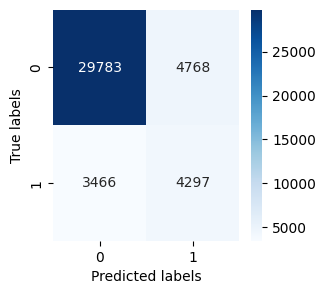

In [56]:
# Chargement du fichier CSV
results_df = pd.read_csv('Logistique/binary_random_search_smote_results_max.csv')

best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "solver": best_row['solver']
}
# Ajout conditionnel des hyperparamètres s'ils ne sont pas NaN
for param in ['l1_ratio', 'C', 'penalty', 'class_weight']:
    if param in best_row and not pd.isna(best_row[param]):
        best_params[param] = best_row[param]

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train_smote, y_train_smote)

# Enregistrement du modèle
joblib.dump(log_model_best, f"Logistique/binary_best_random_smote_model.joblib")

# Prédiction des classes pour l'ensemble de test
y_pred = log_model_best.predict(X_test)

# Calcul de la matrice de confusion en spécifiant les labels
labels = [0, 1]  # Remplacez par vos véritables labels si ce ne sont pas 0 et 1
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [57]:
# Rapport de classification
report = classification_report(y_test, y_pred, labels=[0, 1], target_names=["Class 0", "Class 1"], digits=5)
print(report)

              precision    recall  f1-score   support

     Class 0    0.89576   0.86200   0.87855     34551
     Class 1    0.47402   0.55352   0.51070      7763

    accuracy                        0.80541     42314
   macro avg    0.68489   0.70776   0.69463     42314
weighted avg    0.81838   0.80541   0.81107     42314



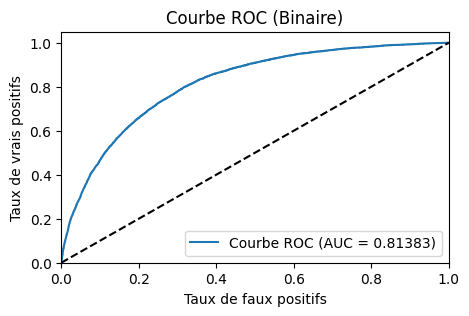

In [58]:
# Prédictions de probabilités pour la classe positive
y_score = log_model_best.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

## 7. Algorithme de boosting : Adaboost

#### Adaboost

Les meilleurs hyperparamètres sont :
{'max_iter': 1000, 'multi_class': 'ovr', 'solver': 'saga', 'C': 1.0, 'penalty': 'l2', 'class_weight': 'balanced'}


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


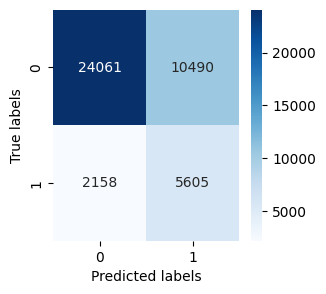

Rapport de classification pour AdaBoost:
              precision    recall  f1-score   support

     Class 0    0.91769   0.69639   0.79187     34551
     Class 1    0.34824   0.72201   0.46986      7763

    accuracy                        0.70109     42314
   macro avg    0.63297   0.70920   0.63087     42314
weighted avg    0.81322   0.70109   0.73279     42314



In [64]:
# Application de l'échantillonnage aléatoire pour équilibrer les classes dans l'ensemble d'entraînement
# ros = RandomOverSampler() # ----------
# X_train_os, y_train_os = ros.fit_resample(X_train, y_train) # ----------
rus = RandomUnderSampler() # ----------
X_train_us, y_train_us = rus.fit_resample(X_train, y_train) # ----------

# Chargement du fichier CSV
# results_df = pd.read_csv('resultats_fabien/binary_random_search_over_results_max.csv') # ----------
results_df = pd.read_csv('Logistique/binary_grid_search_results_max.csv') # ----------

best_index = results_df['F1_class_1'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "solver": best_row['solver']
}
# Ajout conditionnel des hyperparamètres s'ils ne sont pas NaN
for param in ['l1_ratio', 'C', 'penalty', 'class_weight']:
    if param in best_row and not pd.isna(best_row[param]):
        best_params[param] = best_row[param]

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement et évaluation du modèle AdaBoost
base_clf = LogisticRegression(**best_params)
ada = AdaBoostClassifier(base_estimator=base_clf, n_estimators=10, algorithm="SAMME.R", learning_rate=0.01)
# ada.fit(X_train_os, y_train_os) # ----------
# dump(ada, 'modeles_fabien/binary_Adaboost_over_dump.joblib') # ----------
ada.fit(X_train, y_train) # ----------
dump(ada, 'Logistique/binary_Adaboost_under_dump.joblib') # ----------

y_test_pred_ada = ada.predict(X_test)

# Affichage de la matrice de confusion pour AdaBoost
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_test_pred_ada, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Rapport de classification pour AdaBoost
print("Rapport de classification pour AdaBoost:")
report = classification_report(y_test, y_test_pred_ada, labels=labels, target_names=["Class 0", "Class 1"], zero_division=1, digits=5)
print(report)

# 17.4s over
# 9.5s under

## 8. Algorithme de bagging

Les meilleurs hyperparamètres sont :
{'max_iter': 1000, 'multi_class': 'ovr', 'solver': 'saga', 'C': 1.0, 'penalty': 'l2', 'class_weight': 'balanced'}
Moyenne accuracy: 0.7553161330667283

Moyenne F1_class_1: 0.5439653274702918

Moyenne recall_class_1: 0.7953800588846045

Moyenne precision_class_1: 0.41331815451371984

Moyenne precision_macro: 0.677643186067618

Moyenne recall_macro: 0.7708468936207438

Moyenne f1_macro: 0.6883845411469225

Moyenne roc_auc: 0.8499937668974985

Moyenne matthews_corrcoef: 0.43869854411655007

Moyenne Cust_metric: 0.7172683838822488



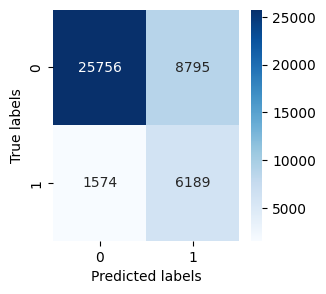

Rapport de classification pour le modèle avec Bagging:
              precision    recall  f1-score   support

    Classe 0    0.94241   0.74545   0.83244     34551
    Classe 1    0.41304   0.79724   0.54416      7763

    accuracy                        0.75495     42314
   macro avg    0.67772   0.77135   0.68830     42314
weighted avg    0.84529   0.75495   0.77955     42314



In [14]:
# Chargement du fichier CSV
results_df = pd.read_csv('Logistique/binary_grid_search_results_max.csv')

# Récupération de la ligne correspondant au meilleur index
best_index = results_df['F1_class_1'].idxmax()
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "solver": best_row['solver']
}
# Ajout conditionnel des hyperparamètres s'ils ne sont pas NaN
for param in ['l1_ratio', 'C', 'penalty', 'class_weight']:
    if param in best_row and not pd.isna(best_row[param]):
        best_params[param] = best_row[param]

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Définition des métriques personnalisées pour la classe 1
def my_metric(y_true, y_pred):
    f1_score_class_0 = f1_score(y_true, y_pred, labels=[0], average=None)[0]
    f1_score_class_1 = f1_score(y_true, y_pred, labels=[1], average=None)[0]
    return (1.5 * f1_score_class_0 + f1_score_class_1) / 2.5

def f1_score_class_1(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[1], average=None)[0]

def recall_score_class_1(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[1], average=None)[0]

def precision_score_class_1(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[1], average=None)[0]

scoring = {
    'accuracy': 'accuracy',
    'F1_class_1': make_scorer(f1_score_class_1),
    'recall_class_1': make_scorer(recall_score_class_1),
    'precision_class_1': make_scorer(precision_score_class_1),
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Création d'un modèle de régression logistique avec les meilleurs hyperparamètres
logistic_model = LogisticRegression(**best_params)

# Utilisation du Bagging avec l'estimateur optimisé
bagging_clf = BaggingClassifier(estimator=logistic_model, n_estimators=5, random_state=42)
cv_results = cross_validate(bagging_clf, X_train, y_train, cv=3, scoring=scoring)

# Affichage des moyennes pour toutes les métriques
for metric in scoring.keys():
    mean_score = np.mean(cv_results['test_' + metric])
    print(f"Moyenne {metric}: {mean_score}\n")

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(cv_results)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('Logistique/binary_bagging_results.csv')

# Entraînement du classificateur Bagging sur le jeu de données d'entraînement
bagging_clf.fit(X_train, y_train)


# Sauvegarde du modèle entraîné
dump(bagging_clf, 'Logistique/binary_Bagging_best_model.joblib')

# prédiction des étiquettes du jeu de données de test
y_pred_bagging = bagging_clf.predict(X_test)

# Affichage de la matrice de confusion sous forme de heatmap
labels = [0, 1]
conf_matrix = confusion_matrix(y_test, y_pred_bagging, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Génération et affichage du rapport de classification
print("Rapport de classification pour le modèle avec Bagging:")
report = classification_report(y_test, y_pred_bagging, labels=labels, target_names=["Classe 0", "Classe 1"], digits=5)
print(report)

# over  : 26m 25.9s

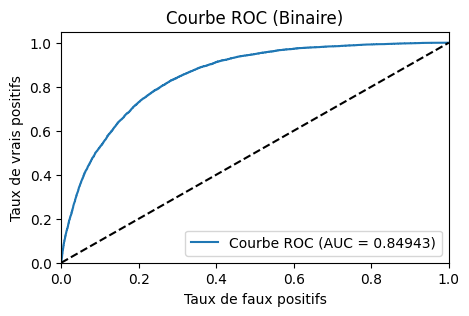

In [15]:
# Prédictions de probabilités pour la classe positive
y_score = bagging_clf.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Binaire)')
plt.legend(loc="lower right")
plt.show()

## 9. Shap

C: 1.0
class_weight: balanced
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 1000
multi_class: ovr
n_jobs: None
penalty: l2
random_state: 42
solver: saga
tol: 0.0001
verbose: 0
warm_start: False
classe 1:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


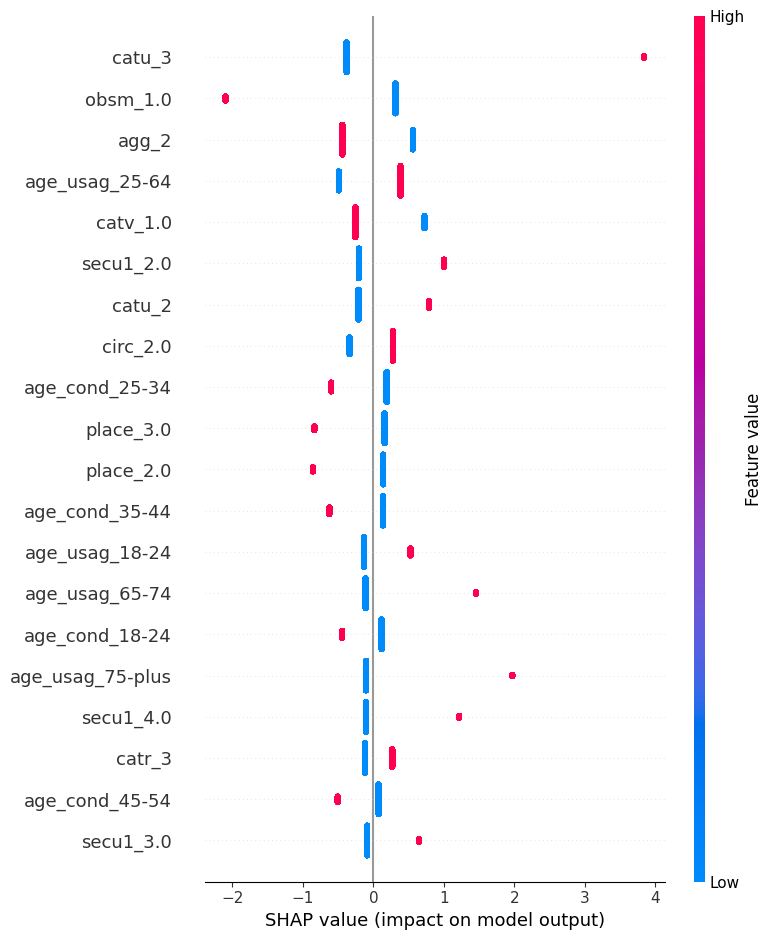

classe 1:


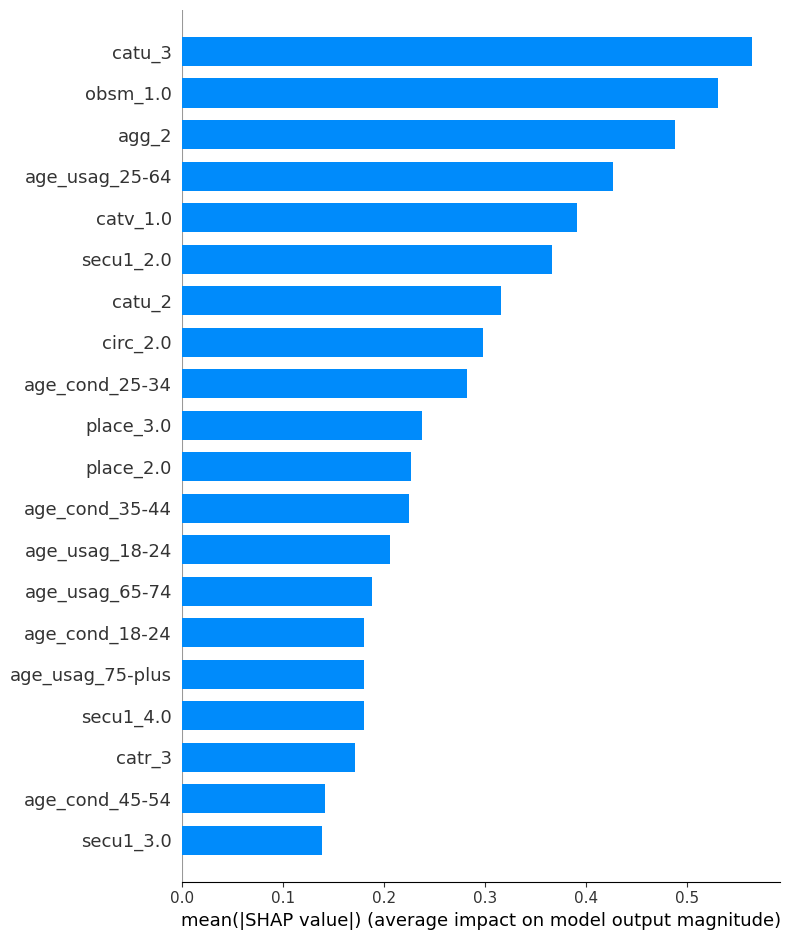

classe 0:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


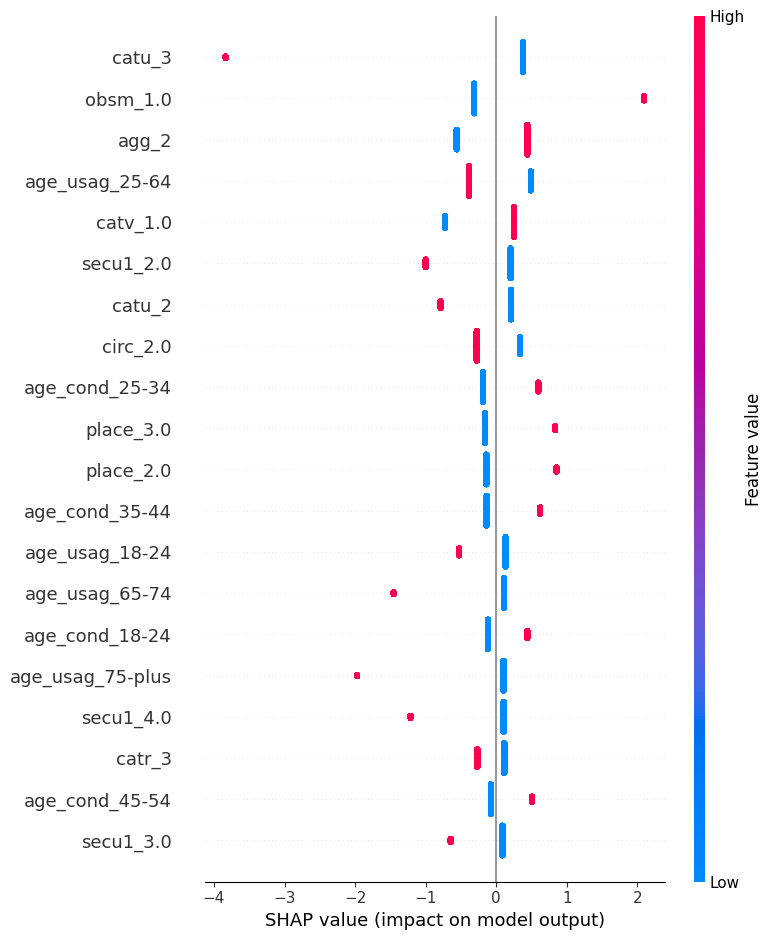

classe 0:


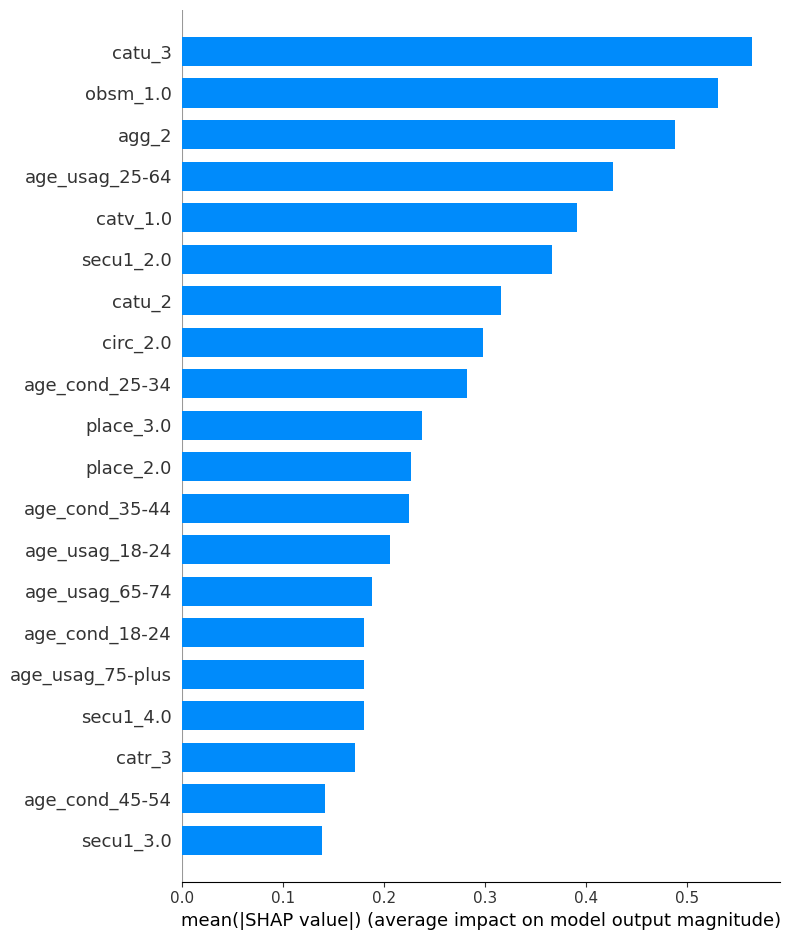

Shape of shap_values: (42314, 181)
Shape of X_test: (42314, 181)
              Feature  Mean Absolute SHAP
0              catu_3            0.563425
1            obsm_1.0            0.529950
2               agg_2            0.487329
3      age_usag_25-64            0.426054
4            catv_1.0            0.390671
5           secu1_2.0            0.366051
6              catu_2            0.315728
7            circ_2.0            0.298079
8      age_cond_25-34            0.282052
9           place_3.0            0.237238
10          place_2.0            0.226830
11     age_cond_35-44            0.224908
12     age_usag_18-24            0.206191
13     age_usag_65-74            0.187717
14     age_cond_18-24            0.180496
15   age_usag_75-plus            0.179949
16          secu1_4.0            0.179794
17             catr_3            0.171721
18     age_cond_45-54            0.141885
19          secu1_3.0            0.138400
20           circ_3.0            0.121222
21         

In [8]:
# Récupération du meilleur modèle
best_model = load('Logistique/binary_best_grid_model.joblib')

# Affichage des hyperparamètres
params = best_model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

# Création d'un explainer SHAP
explainer = shap.Explainer(best_model, X_train)

# Calcul des valeurs SHAP
shap_values = explainer(X_test)

# Affichage de l'importance des caractéristiques pour la classe 1
print("classe 1:")
shap.summary_plot(shap_values.values, X_test)

# Affichage de l'importance des caractéristiques pour la classe 1 sous forme de diagramme en barres
print("classe 1:")
shap.summary_plot(shap_values.values, X_test, plot_type="bar")

# Affichage de l'importance des caractéristiques pour la classe 0
print("classe 0:")
shap.summary_plot(-shap_values.values, X_test)

# Affichage de l'importance des caractéristiques pour la classe 0 sous forme de diagramme en barres
print("classe 0:")
shap.summary_plot(-shap_values.values, X_test, plot_type="bar")

# Affichage des dimensions des valeurs SHAP et de l'ensemble de test
print("Shape of shap_values:", shap_values.values.shape)
print("Shape of X_test:", X_test.shape)

# Obtenir la moyenne des valeurs absolues SHAP pour chaque caractéristique
shap_summary = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_mean = shap_summary.abs().mean().sort_values(ascending=False)

# Créer un DataFrame pour l'importance des caractéristiques SHAP
shap_df = pd.DataFrame({
    'Feature': shap_mean.index,
    'Mean Absolute SHAP': shap_mean.values
})

# Afficher le DataFrame
print(shap_df)

In [11]:
# Affichage des valeurs SHAP pour la première observation de X_test
observation = 0

shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values.values[observation], X_test.iloc[0]))

# Prédictions pour l'ensemble de test
predictions = best_model.predict(X_test)

# Prédiction pour la première observation de X_test
prediction = predictions[observation]
print(f"L'observation est prédite dans la classe: {prediction}")
print(f"Vraie valeur pour l'observation : {y_test.iloc[observation]}")

# valeur négative = classe 0

L'observation est prédite dans la classe: 1.0
Vraie valeur pour l'observation : 1.0
